In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:21:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       1.00      0.93      0.96        28
                                        abdominal hernia       0.92      0.94      0.93        81
                                         abscess of nose       0.76      0.93      0.84        58
                                     abscess of the lung       0.67      1.00      0.80         4
                                  abscess of the pharynx       0.81      0.94      0.87        68
                                    acanthosis nigricans       0.45      0.83      0.59         6
                                               acariasis       0.55      0.86      0.67         7
                                               achalasia       0.52      0.71      0.60        17
                                                    acne       0.65      0.80      0.71       

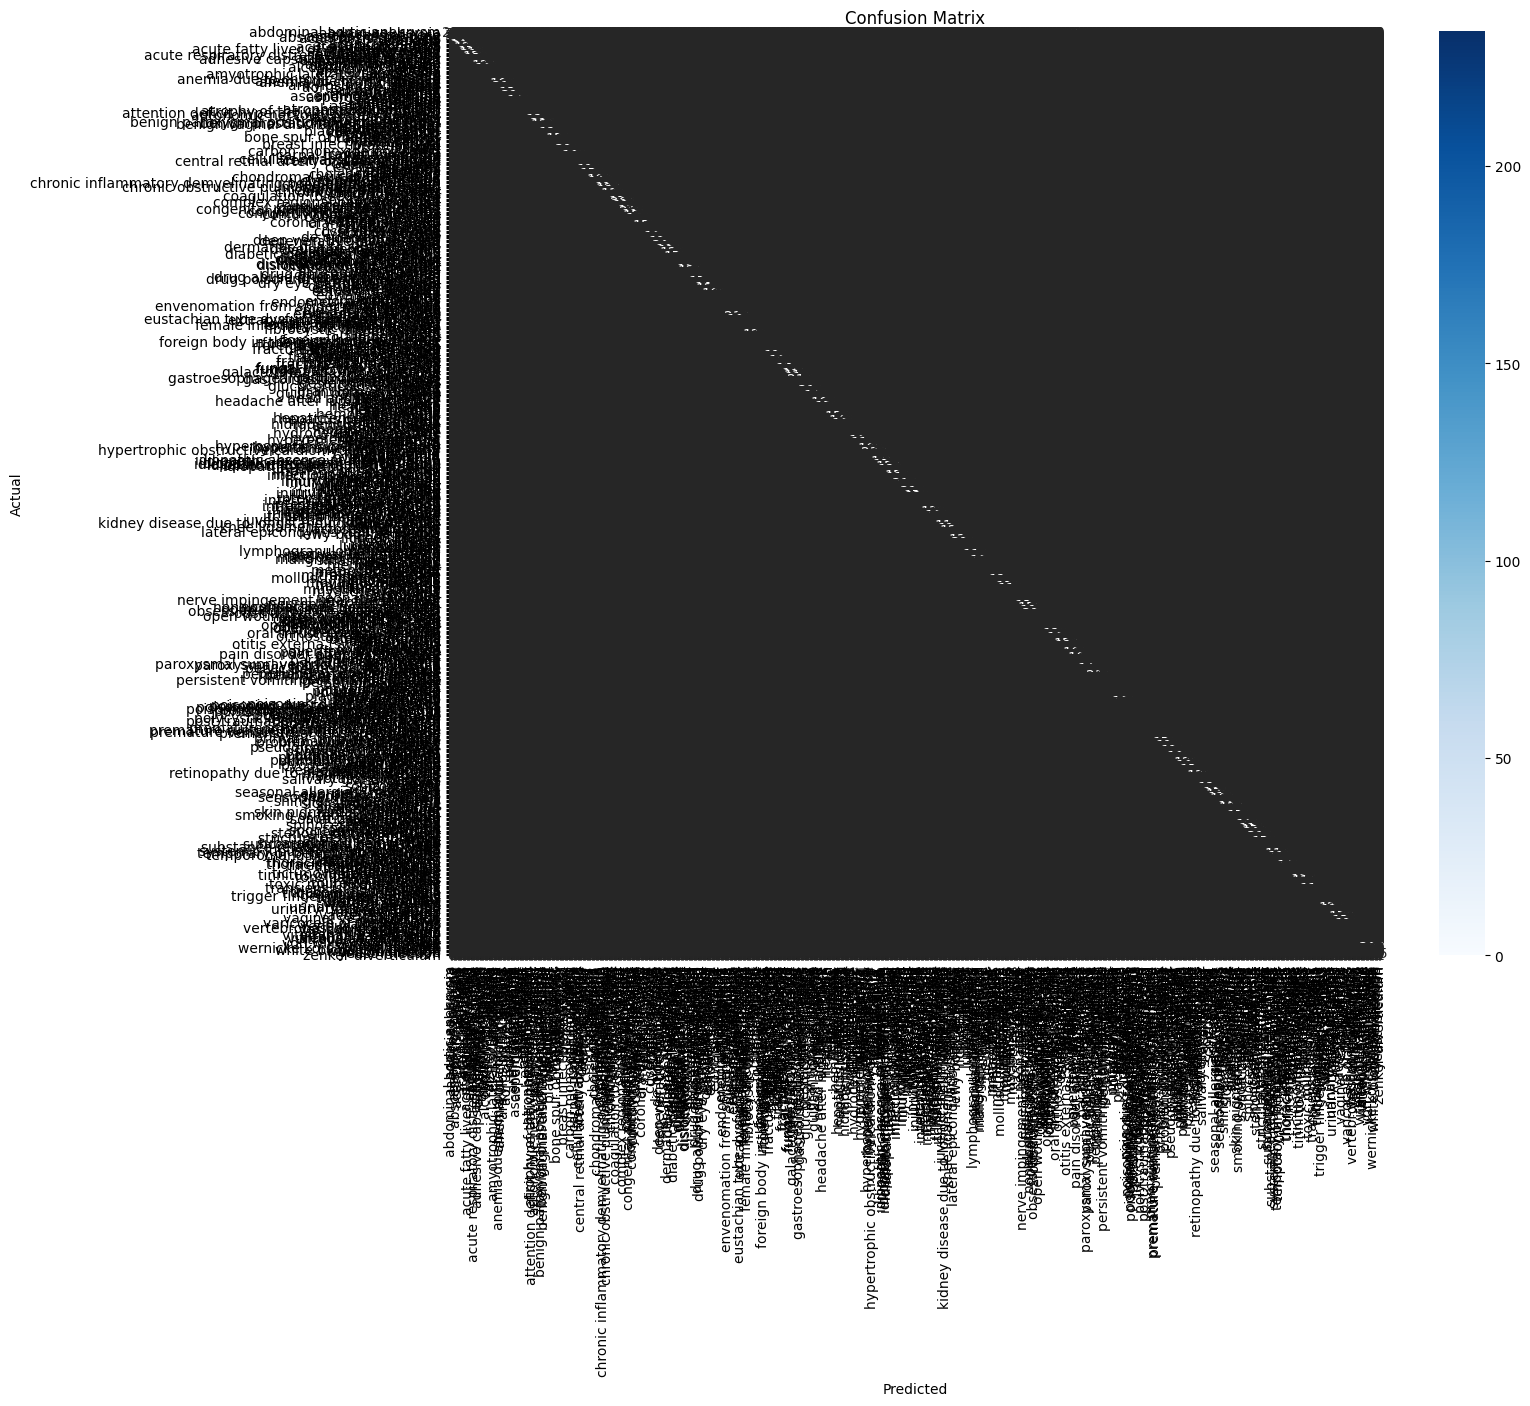

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv("Disease and symptoms dataset.csv")

min_samples = 5
class_counts = data["diseases"].value_counts()
valid_classes = class_counts[class_counts >= min_samples].index
filtered_data = data[data["diseases"].isin(valid_classes)]


le = LabelEncoder()
y = le.fit_transform(filtered_data["diseases"])
X = filtered_data.drop("diseases", axis=1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


classes = np.unique(y_train)
class_weights = compute_class_weight(
    "balanced",
    classes=classes,
    y=y_train
)
sample_weights = np.array([class_weights[cls] for cls in y_train])


model = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1
)
model.fit(X_train, y_train, sample_weight=sample_weights)


y_pred = model.predict(X_test)


print("Classification Report:")
print(classification_report(
    y_test, y_pred,
    target_names=le.classes_,
    zero_division=0
))
